# ANZ Virtual Internship
November 23rd 2020, NYC

## EDA

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

#### Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.
Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data.   
For example -- what is the average transaction amount?   
How many transactions do customers make each month, on average?  

Segment the dataset by transaction date and time.   
Visualise transaction volume and spending over the course of an average day or week.   
Consider the effect of any outliers that may distort your analysis.  

For a challenge – what insights can you draw from the location information provided in the dataset?

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Exploratory data analysis

In [33]:
df.shape

(12043, 23)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [35]:
"""
A function to find columns where there is more than 50% of data missing. 
We will compare the number of available data to all rows in the column to find the percentage of missing data. 
We'll return a list of column names where available data is lower than 50%.
"""
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(column)
    return missing_values

In [36]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['bpay_biller_code', 'merchant_code']


In [37]:
# bpay_biller_code actual available data is only 2 single records
df['bpay_biller_code'].value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [38]:
# merchant_code does not have any available data
df['merchant_code'].unique()

array([nan,  0.])

In [39]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

### Check for low variance

In [40]:
"""
A function to find low variance data. 
Checks if the most recurrent value of the feature is repeated in almost all instances. 
x is percentage of uniform values. 
Return a list of column names where data is same for x%. 
"""
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [41]:
# 90% of data is the same
cols_low = low_variance(df, 90)
print(cols_low)

['currency', 'country', 'movement']


In [42]:
# Only currency is AUD
df['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [43]:
# Only country is Australia
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [44]:
# 92.7% of transactions are paid with debit
df['movement'].value_counts(normalize=True)*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

In [45]:
# Drop columns with no variance
df = df.drop(['currency', 'country'], axis=1)

## Date and time

In [90]:
from datetime import datetime

In [91]:
# drop column 'date' which is same as column 'extraction' with time
df.drop('date', axis=1, inplace=True)

In [92]:
# remove characters after seconds
df['extraction'] = df['extraction'].str.split('.').str[0]

In [93]:
df['extraction'][0]

'2018-08-01T01:01:15'

In [94]:
# convert string to datetime
df['extraction'] = pd.to_datetime(df['extraction'], format='%Y-%m-%dT%H:%M:%S')
print('date_object =', df['extraction'][0])
print('type of date_object =', type(df['extraction'][0]))

date_object = 2018-08-01 01:01:15
type of date_object = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [96]:
# Add columns date, month, day, time, hour and rename 'extraction' to 'datetime'
df['date'] = df['extraction'].dt.date
df['month'] = df['extraction'].dt.month
df['day'] = df['extraction'].dt.day
df['time'] = df['extraction'].dt.time
df['hour'] = df['extraction'].dt.hour
df.rename(columns = {'extraction':'datetime'}, inplace = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  datetime           12043 non-null  datetime64[ns]
 13  amount             12043 non-null  float64       
 14  transa

# Output cleaned data set

In [179]:
df.to_excel('clean_anz.xlsx', index=False)
print('File saved!')

File saved!


### Decide what to do with rest of missing values

In [111]:
# Number of NaN values
# merchant_state, merchant_suburb, card_present_flag, merchant_long_lat, merchant_id

null_values = df.isnull().sum().sort_values(ascending=False).head(8)
print(null_values)

merchant_state       4326
merchant_suburb      4326
card_present_flag    4326
merchant_long_lat    4326
merchant_id          4326
account                 0
long_lat                0
txn_description         0
dtype: int64


In [113]:
df[df['merchant_state'].isnull()].head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,gender,age,...,amount,transaction_id,customer_id,merchant_long_lat,movement,date,month,day,time,hour
5,posted,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,M,20,...,163.0,1005b48a6eda4ffd85e9b649dc9467d3,CUS-2688605418,NaN,debit,2018-08-01,8,1,02:00:00,2
9,posted,NaN,ACC-602667573,151.23 -33.96,INTER BANK,NaN,Michael,466.58,M,40,...,21.0,798a77869014441b840a7a8a23408332,CUS-2031327464,NaN,debit,2018-08-01,8,1,06:00:00,6
10,posted,NaN,ACC-2171593283,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,M,19,...,27.0,baff17b27b2643c48c84fca7129e9611,CUS-2317998716,NaN,debit,2018-08-01,8,1,06:00:00,6
11,posted,NaN,ACC-2776252858,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,F,43,...,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,CUS-4123612273,NaN,debit,2018-08-01,8,1,06:00:00,6
13,posted,NaN,ACC-588564840,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,M,23,...,25.0,eaafa602902b4f4194efb96a105dd7ab,CUS-1462656821,NaN,debit,2018-08-01,8,1,07:00:00,7


In [105]:
# The same records have missing values
df[['merchant_state', 'merchant_suburb', 'card_present_flag', 'merchant_long_lat', 'merchant_id']][df['merchant_state'].isnull()]

,merchant_state,merchant_suburb,card_present_flag,merchant_long_lat,merchant_id
5,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
12027,NaN,NaN,NaN,NaN,NaN
12032,NaN,NaN,NaN,NaN,NaN
12035,NaN,NaN,NaN,NaN,NaN
12036,NaN,NaN,NaN,NaN,NaN


In [107]:
# Records where 'status' is marked as posted has missing values for the merchant
df[df['merchant_state'].isnull()]['status'].value_counts()

posted    4326
Name: status, dtype: int64

In [109]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

### Gather some interesting overall insights about the data.  

In [119]:
df.head(2)

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,gender,age,...,amount,transaction_id,customer_id,merchant_long_lat,movement,date,month,day,time,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,2018-08-01,8,1,01:01:15,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,2018-08-01,8,1,01:13:45,1


In [117]:
# Average transaction amount
df['amount'].mean()

187.93358797641767

In [125]:
# How many transactions do customers make each month, on average?
df.groupby('customer_id')['transaction_id'].count().mean()

120.43

### Segment the dataset by transaction date and time.     
Visualise transaction volume and spending over the course of an average day or week.    
Consider the effect of any outliers that may distort your analysis. 

In [153]:
df[df['day']==1].groupby(['month', 'day']).agg({'transaction_id':'size'}).mean()

transaction_id    125.666667
dtype: float64

In [176]:
df.groupby(['month', 'day']).agg({'transaction_id':'size'})

transaction_id
month day                
8     1               137
      2               152
      3               157
      4               118
      5               100
...                   ...
10    27              139
      28              143
      29              102
      30               89
      31              141

[91 rows x 1 columns]

In [177]:
df.groupby(['month', 'day'])['transaction_id'].count()

month  day
8      1      137
       2      152
       3      157
       4      118
       5      100
             ... 
10     27     139
       28     143
       29     102
       30      89
       31     141
Name: transaction_id, Length: 91, dtype: int64

In [170]:
df.groupby(['day', 'hour'])['transaction_id'].count()

In [99]:
# account and customer_id have 100 values
df['account'].value_counts()
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [ ]:
# each transaction_id has 1 customer_id and 1 account

In [115]:
n_by_account = df.groupby('customer_id')['account'].count()
n_by_account.head()

customer_id
CUS-1005756958     73
CUS-1117979751    100
CUS-1140341822     80
CUS-1147642491    118
CUS-1196156254    245
Name: account, dtype: int64

In [292]:
# 75% of customers are between age 18 and 38, median age 28
df['age'].describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

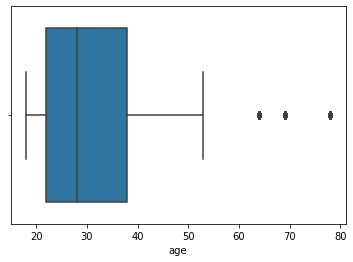

In [358]:
sns.boxplot(x=df['age'])

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  datetime           12043 non-null  datetime64[ns]
 13  amount             12043 non-null  float64       
 14  transa

In [361]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [412]:
is_salary = df['amount'][df['txn_description']=='PAY/SALARY']

In [406]:
is_salary = pd.DataFrame(is_salary).sort_values(by='amount', ascending=False)

In [387]:
is_salary[is_salary>5500]

833      6024.49
2401     8835.98
4822     6024.49
6529     8835.98
7322     6107.23
10429    8835.98
10430    8835.98
11360    6107.23
Name: amount, dtype: float64

<AxesSubplot:>

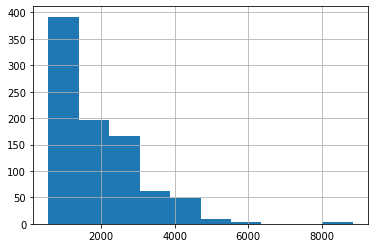

In [372]:
is_salary.hist()

In [368]:
not_salary = df['amount'][df['txn_description']!='PAY/SALARY']

In [370]:
not_salary.describe()

count    11160.000000
mean        52.572343
std        156.354143
min          0.100000
25%         15.190000
50%         26.930000
75%         45.000000
max       7081.090000
Name: amount, dtype: float64

In [427]:
df[df['first_name']=='Tim'].groupby('txn_description').median()

,card_present_flag,balance,age,amount,month,day,hour
txn_description,,,,,,,
INTER BANK,NaN,62264.220,40.0,39.00,9.0,13.0,6.0
PAY/SALARY,NaN,73648.545,40.0,8835.98,9.5,19.5,13.0
PAYMENT,NaN,62560.220,40.0,47.00,9.0,17.0,7.0
POS,1.0,68391.330,40.0,39.66,10.0,4.0,11.0
SALES-POS,1.0,65031.405,40.0,48.09,9.0,14.5,9.5
